# Spam Classifier Notebook

This notebook (created on Databricks) shows how to train a ML Model with Spark and the use of Spark SQL to clean and prepare the dataset.

The scope is to train a Spam Detection Model to classify the doducment in:
- web pages
- online job vacancies

We will use the component of Spark MLIB to transform the input dataset, clean the text, extract the features, train the model and evaluate our results.

The gold dataset is composed by:
- 1,000 web pages from Reddit
- 1,000 online job vacancies from Amazon Jobs

In [0]:
%sql 

select * from default.job_pages

_c0 title url location description job_id 0 2021 - Amazon Versand-/Lagermitarbeiter (m/w/d) - Achim https://www.amazon.jobs/en/jobs/SF210052950/2021-amazon-versand-lagermitarbeiter-m-w-d-achim ['location'] DESCRIPTION
Amazon Logistik Achim GmbH
Max-Naumann-Strasse 1
28832 Achim

 Amazon sucht motivierte Versandmitarbeiter/-innen (m/w/d) für das Logistikzentrum in Achim. Stundenlohn von mind. 11,92 € (brutto).
Klicke auf "Fortsetzen" am Ende dieser Seite und sende deine Bewerbung ab. Es dauert nur wenige Minuten.
Keine Logistik-Vorerfahrung? Egal, wir arbeiten dich ein. Was zählt ist einzig deine Motivation.

Bewirb dich jetzt – wir antworten innerhalb von 3 Tagen.
Noch Fragen? Ruf an unter 0800-4030189 oder sende ein E-Mail an einsteigen@amazon.de. Wir melden uns bei dir.


Amazon benötigt Unterstützung, um die Menschen in der Region beliefern zu können.
Hilf uns dabei ein Lächeln zu versenden.

Viele gute Gründe in unser Team zu kommen:
 Bei Amazon geht‘s schnell: Innerhalb von 3 Tagen weißt Du Bescheid
Stundenlohn von mind. 11,92 € (brutto) + bezahlte Überstunden
Möglichkeit zur betrieblichen Altersvorsorge
Kostenlose Erwerbsunfähigkeits- und Lebensversicherung
28 Urlaubstage (bei einer durchschnittlichen 5-Tage Woche)
Durch langfristige Schichtplanung lassen sich Job und Privatleben gut vereinbaren
Nutze die Chance! Arbeite in einem High-Tech Arbeitsumfeld beim weltweit führenden Logistikunternehmen
Unsere Arbeitsplätze sind klimatisiert und erfüllen hohe Standards in Bezug auf die Arbeitssicherheit. Die Kantine bietet günstige Preise, Heißgetränke und Wasser sind frei. In den Pausenräumen erwarten dich Videospiele, Computer, Tischfußball und vieles mehr!

Hier kannst Du mehr über den Arbeitsalltag unserer Teammitglieder erfahren und herausfinden warum sie sich für Amazon entschieden haben.

Deine Aufgaben im Team:
Waren annehmen und einlagern
Kommissionieren mit Scanner
Bestellungen verpacken und versenden

Schau dir dieses Video an und gewinne einen ersten Eindruck von der Arbeit bei Amazon. SF210052950 1 2021 - Amazon Versand-/Lagermitarbeiter (m/w/d) - Rheinberg https://www.amazon.jobs/en/jobs/SF200051662/2021-amazon-versand-lagermitarbeiter-m-w-d-rheinberg ['location'] DESCRIPTION
2021 - Amazon Versand-/Lagermitarbeiter (m/w/d) - Rheinberg
Stellen ID: 200051662
 2021 – Amazon Versand-/Lagermitarbeiter (m/w/d) – Rheinberg

Amazon Fulfillment Germany GmbH
Amazonstr. 1
47495 Rheinberg

 Amazon sucht motivierte Versandmitarbeiter/-innen (m/w/d) für das Logistikzentrum in Rheinberg. Stundenlohn von mind. 11,82 € (brutto).
Klicke auf "Fortsetzen" am Ende dieser Seite und sende deine Bewerbung ab. Es dauert nur wenige Minuten.
Keine Logistik-Vorerfahrung? Egal, wir arbeiten dich ein. Was zählt ist einzig deine Motivation.

Bewirb dich jetzt – wir antworten innerhalb von 3 Tagen.
Noch Fragen? Ruf an unter 0800-4030189 oder sende ein E-Mail an einsteigen@amazon.de. Wir melden uns bei dir.


Amazon benötigt Unterstützung, um die Menschen in der Region beliefern zu können.
Hilf uns dabei ein Lächeln zu versenden.

Viele gute Gründe in unser Team zu kommen:
 Bei Amazon geht‘s schnell: Innerhalb von 3 Tagen weißt Du Bescheid
Stundenlohn von mind. 11,82 € (brutto) + bezahlte Überstunden
Möglichkeit zur betrieblichen Altersvorsorge
Kostenlose Erwerbsunfähigkeits- und Lebensversicherung
28 Urlaubstage (bei einer durchschnittlichen 5-Tage Woche)
Durch langfristige Schichtplanung lassen sich Job und Privatleben gut vereinbaren
Nutze die Chance! Arbeite in einem High-Tech Arbeitsumfeld beim weltweit führenden Logistikunternehmen
Unsere Arbeitsplätze sind klimatisiert und erfüllen hohe Standards in Bezug auf die Arbeitssicherheit. Die Kantine bietet günstige Preise, Heißgetränke und Wasser sind frei. In den Pausenräumen erwarten dich Videospiele, Computer, Tischfußball und vieles mehr!

Hier kannst Du mehr über den Arbeitsalltag unserer Teammitglieder erfahren und herausfinden warum sie sich für Amazon entschieden haben.

Deine Aufgaben i

In [0]:
%sql

select * from default.web_pages

_c0 text title url 0 Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts
Log In
Sign Up
User account menu
News
r/news
Join
Hot
New
Top
160
PINNED BY MODERATORS
Posted byu/NewsModTeam
Does not answer PMs
3 hours ago
Day 3
Megathread 2 - George Floyd: Derek Chauvin trial
3.1k Comments
Share
Save
16.0k
Posted byu/cutestudent
6 hours ago
3
8
4
5
2
Pfizer says Covid vaccine 100 percent effective in children ages 12 to 15
nbcnews.com/health...
1.1k Comments
Share
Save
Vote
PROMOTED•Posted byu/eBay_Inc
21 days ago
Certified Refurbished is the smarter way to save. Looks like new. Works like new. Costs less than new.
1/2
Up to 50% off refurbished faves
ebay.com
Learn More
0 Comments
Share
Save
1.6k
Posted byu/fbreaker
2 hours ago
2
Authorities: Woman punches, knocks man to ground after he tried to choke girlfriend at bowling alley
whdh.com/news/a...
162 Comments
Share
Save
51.6k
Posted byu/werdmouf
15 hours ago
& 76 More
New York legalizes recreational marijuana, expunges former pot convictions
abcnews.go.com/US/yor...
2.1k Comments
Share
Save
52.6k
Posted byu/coeruleumblue
17 hours ago
10
17
10
& 13 More
Matt Gaetz reportedly under DOJ investigation for possible sex trafficking of 17-year-old; he says he's being extorted
cnbc.com/amp/20...
3.9k Comments
Share
Save
1.6k
Posted byu/chalk46
7 hours ago
Man who killed his mother arrested in brutal attack on Asian woman in NYC
cbsnews.com/news/a...
352 Comments
Share
Save
914
Posted byu/Jean_Zombi
5 hours ago
Olympic gold medalist charged with child sex abuse in Utah
abcnews4.com/news/n...
140 Comments
Share
Save
509
Posted byu/ReallyJustTheFacts
3 hours ago
Wisconsin Supreme Court strikes down governor's mask mandate
abcnews.go.com/Health...
244 Comments
Share
Save
53.5k
Posted byu/Maui96793
20 hours ago
10
9
9
& 17 More
Votes are being counted as Amazon workers historic attempt to unionize in Alabama
abcnews.go.com/Busine...
2.2k Comments
Share
Save
281
Posted byu/sadajo
2 hours ago
Some Capitol riot suspects apologize as consequences sink in
apnews.com/articl...
158 Comments
Share
Save
Vote
PROMOTED•Posted byu/thenewyorktimes
1 month ago
16
10
4
9
New York Times journalism can help you understand the world around you, from your biggest challenges to your quirkiest questions.
https://www.nytimes.com/subscription/...
Learn More
0 Comments
Share
Save
468
Posted byu/thewholedamnplanet
6 hours ago
6-month-old rescued after being thrown into Rio Grande, Texas DPS says
everythinglubbock.com/news/l...
76 Comments
Share
Save
About Community
The place for news articles about current events in the United States and the rest of the world. Discuss it all here.
23.0m
Members
42.8k
Online
Created Jan 25, 2008
Filter by flair
Day 3Not News 
Related Communities
r/USNEWS
22,978 members
Join
r/SaddestBackflip
20,698 members
Join
r/inthenews
104,529 members
Join
r/NewsOfTheWeird
59,351 members
Join
r/nottheonion
19,024,954 members
Join
r/offbeat
612,717 members
Join
r/NewsOfTheStupid
98,557 members
Join
r/TheOnion
160,171 members
Join
r/law
155,791 members
Join
r/Foodforthought
347,015 members
Join
r/news Rules
1.
Not news
2.
Opinion/analysis or advocacy piece
3.
Politics
4.
Title not from article/editorialized title
5.
Paywall or is blogspam/steals content
6.
Covers an already-submitted story
7.
Racist, sexist, vitriolic, or overly crude
8.
Unnecessarily rude or provocative
9.
Cheap or distracting joke or meme
10.
Breaks sitewide rules, witchhunting
11.
Advocating or celebrating death
Moderators
Message the mods
u/Kylde
The Janitor
u/Elderthedog
Does not answer PMs
u/ani625
u/luster
u/hoosakiwi
u/DiggDejected
u/todayilearned83
u/gutpocketsucks
u/ReganDryke
u/pussgurka
VIEW ALL MODERATORS
Help
Reddit App
Reddit Coins
Reddit Premium
Reddit Gifts
About
Careers
Press
Advertise
Blog
Terms
Content Policy
Privacy Policy
Mod Policy
Reddit Inc © 2021. All rights reserved
Back to Top News https://www.reddit.com/r/news/ 1 Press J to jump to the feed. Press question mark to le

Let's do an union between the two dataset,

we will take 1,000 records from job_pages table and 1,000 records from web_pages

In [0]:
job_pages = spark.sql("select title, description as text, 0 as target from default.job_pages")
web_pages = spark.sql("select title, text, 1 as target from default.web_pages")
gold_dataset = job_pages.union(web_pages)

With Spark, we can create a custom temp view on our dataset and use Spark SQL to query the data.

In [0]:
gold_dataset.createOrReplaceTempView("gold_dataset")

First of all, we check the distribution of our target.
This notebook will take in input a text and predict the category of the page.

In [0]:
%sql 
select count(*) from gold_dataset

count(1) 2001

In [0]:
%sql

select target, count(*) num from gold_dataset group by target order by num desc

target num 1 1001 0 1000

Our data have an balanced distribution.

Now, we can split the data in train and test dataset.
The training data is used to make sure the machine recognizes patterns in the data, and the test data is used to see how well the machine can predict new answers based on its training.

In [0]:
train, test = gold_dataset.randomSplit([0.6, 0.4], seed=12345)

In [0]:
train.createOrReplaceTempView("train")
test.createOrReplaceTempView("test")

In [0]:
%sql

select target, count(*) num from train group by target order by num desc

target num 0 620 1 589

In [0]:
%sql

select target, count(*) num from test group by target order by num desc

target num 1 412 0 380

Our goal is to create a pipeline that receive in input a dataset and perform this task:
- select the correct feature
- apply a tokenization method to split the description in sigle words
- filter tokens and remove the noise
- create ngrams from text
- train a word2vec model
- tran a Logistic Regression model and a NaiveBayes model
- test our performance

First, let's select only the imortant feature. We will use the description to predict the category.
During this task, we make lowercase the text and we remove some noise...

To remove some noise, we often use regular expression:
https://en.wikipedia.org/wiki/Regular_expression

In [0]:

train_cleaned = spark.sql("select regexp_replace(title || '' '' || text, '[0-9]', ' ') as text_cleaned, target from train")
train_cleaned = train_cleaned.filter("length(text_cleaned) > 0")
display(train_cleaned.select("*").limit(10))

text_cleaned target (Sr.) ISV Account Manager Amazon Web Services (Part Time: - hours/week)DESCRIPTION
Do you have passion for emerging business models and supporting strategic German Software Companies in their journey to and in the cloud? Do you have the business savvy and the technical understanding necessary to expand & accelerate AWS leadership as the key technology provider and innovation enabler in German Software Industry?
Established German Software Companies (Independent Software Vendors or ISVs) are challenged by disruptive start-ups and new evolving business models from around the world. Innovation is happening right now through new and innovative usage and integration of AI, IoT, ML, Voice etc to existing systems. Be at the heart of the business model transformation and guide software companies as trusted advisor through their transformational journey from traditional to SaaS business model, enabling them to be more innovative and bring breakthrough Software Made in Germany to the worldwide market!
As ISV Account Manager you will have the unique opportunity to drive and shape the future of the Software Industry and AWS in Germany.

The ideal candidate will drive an engagement at the executive level as well as with software architects and have combination of sales / account management and technical understanding of software industry. She/he should also be an innovation oriented self-starter who is prepared to develop and execute against a territory coverage plan and consistently deliver results.


Locations: Munich office or Berlin office


Roles & Responsibilities:
· Ensure customer satisfaction
· Act as a trusted advisor to senior management in software companies
· Support Software Companies in their development towards SaaS business model
· Establish long-term relationships and strategic partnerships with ISVs
· Manage accounts concurrently & strategically
· Develop thought leadership in Software as a Service business model area
· Develop and execute against a territory plan, meet or exceed your quarterly targets
· Articulate compelling value propositions around AWS services
· Limited travel within Germany 0 - Amazon Versand-/Lagermitarbeiter (m/w/d) - AchimDESCRIPTION
Amazon Logistik Achim GmbH
Max-Naumann-Strasse 
 Achim

 Amazon sucht motivierte Versandmitarbeiter/-innen (m/w/d) für das Logistikzentrum in Achim. Stundenlohn von mind. , € (brutto).
Klicke auf "Fortsetzen" am Ende dieser Seite und sende deine Bewerbung ab. Es dauert nur wenige Minuten.
Keine Logistik-Vorerfahrung? Egal, wir arbeiten dich ein. Was zählt ist einzig deine Motivation.

Bewirb dich jetzt – wir antworten innerhalb von Tagen.
Noch Fragen? Ruf an unter - oder sende ein E-Mail an einsteigen@amazon.de. Wir melden uns bei dir.


Amazon benötigt Unterstützung, um die Menschen in der Region beliefern zu können.
Hilf uns dabei ein Lächeln zu versenden.

Viele gute Gründe in unser Team zu kommen:
 Bei Amazon geht‘s schnell: Innerhalb von Tagen weißt Du Bescheid
Stundenlohn von mind. , € (brutto) + bezahlte Überstunden
Möglichkeit zur betrieblichen Altersvorsorge
Kostenlose Erwerbsunfähigkeits- und Lebensversicherung
 Urlaubstage (bei einer durchschnittlichen -Tage Woche)
Durch langfristige Schichtplanung lassen sich Job und Privatleben gut vereinbaren
Nutze die Chance! Arbeite in einem High-Tech Arbeitsumfeld beim weltweit führenden Logistikunternehmen
Unsere Arbeitsplätze sind klimatisiert und erfüllen hohe Standards in Bezug auf die Arbeitssicherheit. Die Kantine bietet günstige Preise, Heißgetränke und Wasser sind frei. In den Pausenräumen erwarten dich Videospiele, Computer, Tischfußball und vieles mehr!

Hier kannst Du mehr über den Arbeitsalltag unserer Teammitglieder erfahren und herausfinden warum sie sich für Amazon entschieden haben.

Deine Aufgaben im Team:
Waren annehmen und einlagern
Kommissionieren mit Scanner
Bestellungen verpacken und versenden

Schau dir dieses Video an und gewinne einen ersten Eindruck von der Arbeit bei Ama

### Pre-processing (clean text and reduce features)

Spark has two tokenizer component (called transformers):
- Default Tokenizer
- RegexTokenizer

We use the RegexTokenize to make sure to split the description by ' ' and contestually remove some special chars (like |,/!....).

Each Spark transformers usually have:
- an inputCol: the column used as input during the transformation
- an outputCol: the column created as output of the transformer
- a transform method that takes in input a dataset and produce a new dataset with all the columns of the incoming dataset with (plus) the outputCol

In [0]:
from pyspark.ml.feature import RegexTokenizer
from pyspark.sql.functions import col, udf
from pyspark.sql.types import IntegerType

regexTokenizer = RegexTokenizer(inputCol="text_cleaned", outputCol="words", pattern="\\W")
tokenized = regexTokenizer.transform(train_cleaned)

# check our results
countTokens = udf(lambda words: len(words), IntegerType())

tokenized_counts = tokenized.select("text_cleaned", "words").withColumn("tokens", countTokens(col("words")))
display(tokenized_counts.select("*").limit(10))

text_cleaned words tokens (Sr.) ISV Account Manager Amazon Web Services (Part Time: - hours/week)DESCRIPTION
Do you have passion for emerging business models and supporting strategic German Software Companies in their journey to and in the cloud? Do you have the business savvy and the technical understanding necessary to expand & accelerate AWS leadership as the key technology provider and innovation enabler in German Software Industry?
Established German Software Companies (Independent Software Vendors or ISVs) are challenged by disruptive start-ups and new evolving business models from around the world. Innovation is happening right now through new and innovative usage and integration of AI, IoT, ML, Voice etc to existing systems. Be at the heart of the business model transformation and guide software companies as trusted advisor through their transformational journey from traditional to SaaS business model, enabling them to be more innovative and bring breakthrough Software Made in Germany to the worldwide market!
As ISV Account Manager you will have the unique opportunity to drive and shape the future of the Software Industry and AWS in Germany.

The ideal candidate will drive an engagement at the executive level as well as with software architects and have combination of sales / account management and technical understanding of software industry. She/he should also be an innovation oriented self-starter who is prepared to develop and execute against a territory coverage plan and consistently deliver results.


Locations: Munich office or Berlin office


Roles & Responsibilities:
· Ensure customer satisfaction
· Act as a trusted advisor to senior management in software companies
· Support Software Companies in their development towards SaaS business model
· Establish long-term relationships and strategic partnerships with ISVs
· Manage accounts concurrently & strategically
· Develop thought leadership in Software as a Service business model area
· Develop and execute against a territory plan, meet or exceed your quarterly targets
· Articulate compelling value propositions around AWS services
· Limited travel within Germany List(sr, isv, account, manager, amazon, web, services, part, time, hours, week, description, do, you, have, passion, for, emerging, business, models, and, supporting, strategic, german, software, companies, in, their, journey, to, and, in, the, cloud, do, you, have, the, business, savvy, and, the, technical, understanding, necessary, to, expand, accelerate, aws, leadership, as, the, key, technology, provider, and, innovation, enabler, in, german, software, industry, established, german, software, companies, independent, software, vendors, or, isvs, are, challenged, by, disruptive, start, ups, and, new, evolving, business, models, from, around, the, world, innovation, is, happening, right, now, through, new, and, innovative, usage, and, integration, of, ai, iot, ml, voice, etc, to, existing, systems, be, at, the, heart, of, the, business, model, transformation, and, guide, software, companies, as, trusted, advisor, through, their, transformational, journey, from, traditional, to, saas, business, model, enabling, them, to, be, more, innovative, and, bring, breakthrough, software, made, in, germany, to, the, worldwide, market, as, isv, account, manager, you, will, have, the, unique, opportunity, to, drive, and, shape, the, future, of, the, software, industry, and, aws, in, germany, the, ideal, candidate, will, drive, an, engagement, at, the, executive, level, as, well, as, with, software, architects, and, have, combination, of, sales, account, management, and, technical, understanding, of, software, industry, she, he, should, also, be, an, innovation, oriented, self, starter, who, is, prepared, to, develop, and, execute, against, a, territory, coverage, plan, and, consistently, deliver, results, locations, munich, office, or, berlin, office, roles, responsibilities, ensure, customer, satisfaction, act, as, 

There is a lot of noise. *What do do?*

Let's check the distribution of the words (by plotting the first 20 tokens by frequency)

In [0]:
from pyspark.sql.functions import explode, desc
tokens = tokenized.select(explode(col("words")).alias("word")).groupBy(col("word")).count().orderBy(desc("count"))
display(tokens.select("*").limit(20))

word count and 9700 to 6506 the 6003 in 4274 of 3652 und 2931 a 2741 your 2597 for 2467 with 2167 amazon 2065 you 1976 account 1764 will 1695 our 1566 on 1547 team 1380 is 1325 business 1315 we 1239

### StopWordsRemover
We can remove stopwords, *i.e. common terms in documents or language that fill our analysis with noise.*

http://spark.apache.org/docs/latest/ml-features.html#stopwordsremover

StopWordsRemover takes as input a sequence of strings (e.g. the output of a Tokenizer) and drops all the stop words from the input sequences. The list of stopwords is specified by the stopWords parameter. Default stop words for some languages are accessible by calling StopWordsRemover.loadDefaultStopWords(language), for which available options are “danish”, “dutch”, “english”, “finnish”, “french”, “german”, “hungarian”, “italian”, “norwegian”, “portuguese”, “russian”, “spanish”, “swedish” and “turkish”. A boolean parameter caseSensitive indicates if the matches should be case sensitive (false by default).

In [0]:
from pyspark.ml.feature import StopWordsRemover
remover = StopWordsRemover(inputCol="words", outputCol="cleaned", caseSensitive=False)

In [0]:
StopWordsRemover.loadDefaultStopWords("english")

Out[9]: ['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 'her',
 'hers',
 'herself',
 'it',
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'no',
 'nor',
 'not',
 'only',
 'own',
 'same',
 'so',
 'than',
 'too',
 'very',
 's',
 't',
 'can',
 'will',
 'just',
 'don',
 'should',
 'now',
 "i'll",
 "you'll",
 "he'll",
 "she'll",
 "we'll",
 "they'll",
 "i'd",
 "you'd",
 "he'd",
 "she'd",
 "we'd",
 "they'd",
 "i'm",
 "you're",
 "he's",
 "she's",
 "it's",
 "we're",
 "they're",
 "i've",
 "we've",
 "you've",
 "they've",
 "isn't",
 "aren't",
 "wasn't",
 "weren't",
 "haven't",
 "hasn't",
 "hadn't",
 "don't",
 "doesn't",
 "didn't",
 "won't",
 "wouldn't",
 "shan't",
 "shouldn't",
 "mustn't",
 "can't",
 "couldn't",
 'cannot',
 'could',
 "here's",
 "how's",
 "let's",
 'ought',
 "that's",
 "there's",
 "what's",
 "when's",
 "where's",
 "who's",
 "why's",
 'would']

In [0]:
de_stopwords = StopWordsRemover.loadDefaultStopWords("german")
en_stopwords = StopWordsRemover.loadDefaultStopWords("english")

In [0]:
len(de_stopwords)

Out[11]: 231

In [0]:
de_stopwords.extend(en_stopwords)

In [0]:
len(de_stopwords)

Out[13]: 412

In [0]:
stopwords = de_stopwords

In [0]:
remover.setStopWords(stopwords)
cleaned = remover.transform(tokenized)
cleaned.show()

+--------------------+------+--------------------+--------------------+
 text_cleaned|target| words| cleaned|
+--------------------+------+--------------------+--------------------+
(Sr.) ISV Account...| 0|[sr, isv, account...|[sr, isv, account...|
 - Amazon Ver...| 0|[amazon, versand,...|[amazon, versand,...|
 - Amazon Ver...| 0|[amazon, versand,...|[amazon, versand,...|
 - Amazon Ver...| 0|[amazon, versand,...|[amazon, versand,...|
 - Amazon Ver...| 0|[amazon, versand,...|[amazon, versand,...|
 - Amazon Ver...| 0|[amazon, versand,...|[amazon, versand,...|
 - Amazon Ver...| 0|[amazon, versand,...|[amazon, versand,...|
 Ausbildung z...| 0|[ausbildung, zum,...|[ausbildung, mech...|
 P Compliance VAT...| 0|[p, compliance, v...|[p, compliance, v...|
 PL Area Manager ...| 0|[pl, area, manage...|[pl, area, manage...|
AI/ML ConsultantD...| 0|[ai, ml, consulta...|[ai, ml, consulta...|
ATL Senior Media ...| 0|[atl, senior, med...|[atl, senior, med...|
AWS Fraud Program...| 0|[aws, fraud, prog...|[aws, fraud, prog...|
AWS Marketing Lea...| 0|[aws, marketing, ...|[aws, marketing, ...|
AWS Program Manag...| 0|[aws, program, ma...|[aws, program, ma...|
AWS Technical Rec...| 0|[aws, technical, ...|[aws, technical, ...|
Abteilungsleiter ...| 0|[abteilungsleiter...|[abteilungsleiter...|
Account Director ...| 0|[account, directo...|[account, directo...|
Account Director ...| 0|[account, directo...|[account, directo...|
Account Director ...| 0|[account, directo...|[account, directo...|
+--------------------+------+--------------------+--------------------+
only showing top 20 rows

Let's check our cleaning performance on the first 20 words

In [0]:
tokens = cleaned.select(explode(col("cleaned")).alias("word")).groupBy(col("word")).count().orderBy(desc("count"))
display(tokens.select("*").limit(20))

word count amazon 2065 account 1764 team 1380 business 1315 facebook 1098 f 998 customers 964 reddit 935 log 928 teams 927 aws 904 customer 867 find 820 forgot 812 us 807 work 748 m 723 new 711 r 700 services 652

We continue to have some noise...

What do do now?

Can we remove too short terms?

How?

In Spark, It's quite easy to define some new function.

http://spark.apache.org/docs/latest/sql-ref-functions-udf-scalar.html

User-Defined Functions (UDFs) are user-programmable routines that act on one row.

In [0]:
from pyspark.sql.functions import udf
from pyspark.sql.types import ArrayType, StringType

# define our custom function to remove too short terms
def filter_by_len(words):
  filtered = [word for word in words if len(word) >= 2]
  return filtered

# register our function as udf
filter_by_len_udf = udf(filter_by_len, ArrayType(StringType()))

In [0]:
filtered = cleaned.withColumn("filtered", filter_by_len_udf(col("cleaned")))
filtered.show()

+--------------------+------+--------------------+--------------------+--------------------+
 text_cleaned|target| words| cleaned| filtered|
+--------------------+------+--------------------+--------------------+--------------------+
(Sr.) ISV Account...| 0|[sr, isv, account...|[sr, isv, account...|[sr, isv, account...|
 - Amazon Ver...| 0|[amazon, versand,...|[amazon, versand,...|[amazon, versand,...|
 - Amazon Ver...| 0|[amazon, versand,...|[amazon, versand,...|[amazon, versand,...|
 - Amazon Ver...| 0|[amazon, versand,...|[amazon, versand,...|[amazon, versand,...|
 - Amazon Ver...| 0|[amazon, versand,...|[amazon, versand,...|[amazon, versand,...|
 - Amazon Ver...| 0|[amazon, versand,...|[amazon, versand,...|[amazon, versand,...|
 - Amazon Ver...| 0|[amazon, versand,...|[amazon, versand,...|[amazon, versand,...|
 Ausbildung z...| 0|[ausbildung, zum,...|[ausbildung, mech...|[ausbildung, mech...|
 P Compliance VAT...| 0|[p, compliance, v...|[p, compliance, v...|[compliance, vat,...|
 PL Area Manager ...| 0|[pl, area, manage...|[pl, area, manage...|[pl, area, manage...|
AI/ML ConsultantD...| 0|[ai, ml, consulta...|[ai, ml, consulta...|[ai, ml, consulta...|
ATL Senior Media ...| 0|[atl, senior, med...|[atl, senior, med...|[atl, senior, med...|
AWS Fraud Program...| 0|[aws, fraud, prog...|[aws, fraud, prog...|[aws, fraud, prog...|
AWS Marketing Lea...| 0|[aws, marketing, ...|[aws, marketing, ...|[aws, marketing, ...|
AWS Program Manag...| 0|[aws, program, ma...|[aws, program, ma...|[aws, program, ma...|
AWS Technical Rec...| 0|[aws, technical, ...|[aws, technical, ...|[aws, technical, ...|
Abteilungsleiter ...| 0|[abteilungsleiter...|[abteilungsleiter...|[abteilungsleiter...|
Account Director ...| 0|[account, directo...|[account, directo...|[account, directo...|
Account Director ...| 0|[account, directo...|[account, directo...|[account, directo...|
Account Director ...| 0|[account, directo...|[account, directo...|[account, directo...|
+--------------------+------+--------------------+--------------------+--------------------+
only showing top 20 rows

In [0]:
tokens = filtered.select(explode(col("filtered")).alias("word")).groupBy(col("word")).count().orderBy(desc("count"))
display(tokens.select("*").limit(20))

word count amazon 2065 account 1764 team 1380 business 1315 facebook 1098 customers 964 reddit 935 log 928 teams 927 aws 904 customer 867 find 820 forgot 812 us 807 work 748 new 711 services 652 support 628 manager 609 english 579

### Ngrams

An n-gram is a sequence of n tokens for some integer *n*.
The NGram component can be used to transform input features into n-grams.

Spark NGram takes as input a sequence of strings.

We will create ngrams for n=2.

In [0]:
from pyspark.ml.feature import NGram
ngrams2 = NGram(n=2, inputCol="cleaned", outputCol="ngrams_2")
ngrams = ngrams2.transform(filtered)

ngrams.show()

+--------------------+------+--------------------+--------------------+--------------------+--------------------+
 text_cleaned|target| words| cleaned| filtered| ngrams_2|
+--------------------+------+--------------------+--------------------+--------------------+--------------------+
(Sr.) ISV Account...| 0|[sr, isv, account...|[sr, isv, account...|[sr, isv, account...|[sr isv, isv acco...|
 - Amazon Ver...| 0|[amazon, versand,...|[amazon, versand,...|[amazon, versand,...|[amazon versand, ...|
 - Amazon Ver...| 0|[amazon, versand,...|[amazon, versand,...|[amazon, versand,...|[amazon versand, ...|
 - Amazon Ver...| 0|[amazon, versand,...|[amazon, versand,...|[amazon, versand,...|[amazon versand, ...|
 - Amazon Ver...| 0|[amazon, versand,...|[amazon, versand,...|[amazon, versand,...|[amazon versand, ...|
 - Amazon Ver...| 0|[amazon, versand,...|[amazon, versand,...|[amazon, versand,...|[amazon versand, ...|
 - Amazon Ver...| 0|[amazon, versand,...|[amazon, versand,...|[amazon, versand,...|[amazon versand, ...|
 Ausbildung z...| 0|[ausbildung, zum,...|[ausbildung, mech...|[ausbildung, mech...|[ausbildung mecha...|
 P Compliance VAT...| 0|[p, compliance, v...|[p, compliance, v...|[compliance, vat,...|[p compliance, co...|
 PL Area Manager ...| 0|[pl, area, manage...|[pl, area, manage...|[pl, area, manage...|[pl area, area ma...|
AI/ML ConsultantD...| 0|[ai, ml, consulta...|[ai, ml, consulta...|[ai, ml, consulta...|[ai ml, ml consul...|
ATL Senior Media ...| 0|[atl, senior, med...|[atl, senior, med...|[atl, senior, med...|[atl senior, seni...|
AWS Fraud Program...| 0|[aws, fraud, prog...|[aws, fraud, prog...|[aws, fraud, prog...|[aws fraud, fraud...|
AWS Marketing Lea...| 0|[aws, marketing, ...|[aws, marketing, ...|[aws, marketing, ...|[aws marketing, m...|
AWS Program Manag...| 0|[aws, program, ma...|[aws, program, ma...|[aws, program, ma...|[aws program, pro...|
AWS Technical Rec...| 0|[aws, technical, ...|[aws, technical, ...|[aws, technical, ...|[aws technical, t...|
Abteilungsleiter ...| 0|[abteilungsleiter...|[abteilungsleiter...|[abteilungsleiter...|[abteilungsleiter...|
Account Director ...| 0|[account, directo...|[account, directo...|[account, directo...|[account director...|
Account Director ...| 0|[account, directo...|[account, directo...|[account, directo...|[account director...|
Account Director ...| 0|[account, directo...|[account, directo...|[account, directo...|[account director...|
+--------------------+------+--------------------+--------------------+--------------------+--------------------+
only showing top 20 rows

And now we can merge the result in a single column with a new udf.

In [0]:
# union of the results
def union_ngrams(c1,c2):
  return c1 + c2

union_ngrams_udf = udf(union_ngrams, ArrayType(StringType()))

ngrams_final = ngrams.filter("filtered is not Null").withColumn("ngrams", union_ngrams_udf(col("filtered"), col("ngrams_2")))
ngrams_final.show()

+--------------------+------+--------------------+--------------------+--------------------+--------------------+--------------------+
 text_cleaned|target| words| cleaned| filtered| ngrams_2| ngrams|
+--------------------+------+--------------------+--------------------+--------------------+--------------------+--------------------+
(Sr.) ISV Account...| 0|[sr, isv, account...|[sr, isv, account...|[sr, isv, account...|[sr isv, isv acco...|[sr, isv, account...|
 - Amazon Ver...| 0|[amazon, versand,...|[amazon, versand,...|[amazon, versand,...|[amazon versand, ...|[amazon, versand,...|
 - Amazon Ver...| 0|[amazon, versand,...|[amazon, versand,...|[amazon, versand,...|[amazon versand, ...|[amazon, versand,...|
 - Amazon Ver...| 0|[amazon, versand,...|[amazon, versand,...|[amazon, versand,...|[amazon versand, ...|[amazon, versand,...|
 - Amazon Ver...| 0|[amazon, versand,...|[amazon, versand,...|[amazon, versand,...|[amazon versand, ...|[amazon, versand,...|
 - Amazon Ver...| 0|[amazon, versand,...|[amazon, versand,...|[amazon, versand,...|[amazon versand, ...|[amazon, versand,...|
 - Amazon Ver...| 0|[amazon, versand,...|[amazon, versand,...|[amazon, versand,...|[amazon versand, ...|[amazon, versand,...|
 Ausbildung z...| 0|[ausbildung, zum,...|[ausbildung, mech...|[ausbildung, mech...|[ausbildung mecha...|[ausbildung, mech...|
 P Compliance VAT...| 0|[p, compliance, v...|[p, compliance, v...|[compliance, vat,...|[p compliance, co...|[compliance, vat,...|
 PL Area Manager ...| 0|[pl, area, manage...|[pl, area, manage...|[pl, area, manage...|[pl area, area ma...|[pl, area, manage...|
AI/ML ConsultantD...| 0|[ai, ml, consulta...|[ai, ml, consulta...|[ai, ml, consulta...|[ai ml, ml consul...|[ai, ml, consulta...|
ATL Senior Media ...| 0|[atl, senior, med...|[atl, senior, med...|[atl, senior, med...|[atl senior, seni...|[atl, senior, med...|
AWS Fraud Program...| 0|[aws, fraud, prog...|[aws, fraud, prog...|[aws, fraud, prog...|[aws fraud, fraud...|[aws, fraud, prog...|
AWS Marketing Lea...| 0|[aws, marketing, ...|[aws, marketing, ...|[aws, marketing, ...|[aws marketing, m...|[aws, marketing, ...|
AWS Program Manag...| 0|[aws, program, ma...|[aws, program, ma...|[aws, program, ma...|[aws program, pro...|[aws, program, ma...|
AWS Technical Rec...| 0|[aws, technical, ...|[aws, technical, ...|[aws, technical, ...|[aws technical, t...|[aws, technical, ...|
Abteilungsleiter ...| 0|[abteilungsleiter...|[abteilungsleiter...|[abteilungsleiter...|[abteilungsleiter...|[abteilungsleiter...|
Account Director ...| 0|[account, directo...|[account, directo...|[account, directo...|[account director...|[account, directo...|
Account Director ...| 0|[account, directo...|[account, directo...|[account, directo...|[account director...|[account, directo...|
Account Director ...| 0|[account, directo...|[account, directo...|[account, directo...|[account director...|[account, directo...|
+--------------------+------+--------------------+--------------------+--------------------+--------------------+--------------------+
only showing top 20 rows

### TF-IDF

In [0]:
from pyspark.ml.feature import HashingTF
from pyspark.ml.feature import IDF

hashing_tf = HashingTF(inputCol="ngrams", outputCol="rawFeatures")
idf = IDF(inputCol="rawFeatures", outputCol="features")
hash_dataset = hashing_tf.transform(ngrams_final)
idf_model = idf.fit(hash_dataset)
idf_dataset = idf_model.transform(hash_dataset)


Now we can evaluate our TF-IDF model.

We try to calculate and snow the TF-IDF of uncommon and common words...

In [0]:
common = spark.createDataFrame(data=[{"ngrams": ["facebook", "amazon"]}], schema = ["ngrams"])
tf_common = hashing_tf.transform(common)
tfidf_common = idf_model.transform(tf_common)
tfidf_common.show(truncate=False)

+------------------+---------------------------------+---------------------------------------------------------------+
ngrams |rawFeatures |features |
+------------------+---------------------------------+---------------------------------------------------------------+
[facebook, amazon]|(262144,[59577,125752],[1.0,1.0])|(262144,[59577,125752],[0.7208219027161659,0.7803841638675089])|
+------------------+---------------------------------+---------------------------------------------------------------+

In [0]:
uncommon = spark.createDataFrame(data=[{"ngrams": ["java", "python"]}], schema = ["ngrams"])
tf_uncommon = hashing_tf.transform(uncommon)
tfidf_uncommon = idf_model.transform(tf_uncommon)
tfidf_uncommon.show(truncate=False)

+--------------+--------------------------------+------------------------------------------------------------+
ngrams |rawFeatures |features |
+--------------+--------------------------------+------------------------------------------------------------+
[java, python]|(262144,[50301,55551],[1.0,1.0])|(262144,[50301,55551],[5.305789381386738,5.488110938180692])|
+--------------+--------------------------------+------------------------------------------------------------+

In [0]:
uncommon = spark.createDataFrame(data=[{"ngrams": ["devops", "vaccine", "pfizer", "milan"]}], schema = ["ngrams"])
tf_uncommon = hashing_tf.transform(uncommon)
tfidf_uncommon = idf_model.transform(tf_uncommon)
tfidf_uncommon.show(truncate=False)

+--------------------------------+--------------------------------------------------------+----------------------------------------------------------------------------------------------------------------+
ngrams |rawFeatures |features |
+--------------------------------+--------------------------------------------------------+----------------------------------------------------------------------------------------------------------------+
[devops, vaccine, pfizer, milan]|(262144,[175757,202507,207641,242678],[1.0,1.0,1.0,1.0])|(262144,[175757,202507,207641,242678],[5.151638701559479,5.151638701559479,4.794963757620747,6.404401670054847])|
+--------------------------------+--------------------------------------------------------+----------------------------------------------------------------------------------------------------------------+

### Train the models

Before the train phase we have to convert target label to index. Spark Estimator usually takes in input category as bin (i.e. integer rapresentation of the class).

So we apply:
- IndexToString to encode the category to its index
- StringIndexer to decode the index to the original category

In [0]:
from pyspark.ml.feature import IndexToString, StringIndexer

indexer = StringIndexer(inputCol="target", outputCol="label")
indexer_model = indexer.fit(idf_dataset)
indexed = indexer_model.transform(idf_dataset)
converter = IndexToString(inputCol="prediction", outputCol="prediction_category", labels=indexer_model.labels)

Let's start with a Logistic Regression

In [0]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, TrainValidationSplit

lr = LogisticRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8, labelCol="label", featuresCol="features")
paramGrid = ParamGridBuilder()\
    .addGrid(lr.elasticNetParam, [0.5, 0.8]) \
    .addGrid(lr.regParam, [0.3, 0.5]) \
    .build()

tvs = TrainValidationSplit(estimator=lr,
                           estimatorParamMaps=paramGrid,
                           evaluator=MulticlassClassificationEvaluator(),
                           trainRatio=0.8)

In [0]:
lr_model = tvs.fit(indexed)

/databricks/spark/python/pyspark/ml/util.py:800: UserWarning: Cannot find mlflow module. To enable MLflow logging, install mlflow from PyPI.
 warnings.warn(_MLflowInstrumentation._NO_MLFLOW_WARNING)

Now, we check the training summary

In [0]:
trainingSummary = lr_model.bestModel.summary

# Obtain the objective per iteration
objectiveHistory = trainingSummary.objectiveHistory
print("objectiveHistory:")
for objective in objectiveHistory:
    print(objective)

# for multiclass, we can inspect metrics on a per-label basis
print("False positive rate by label:")
for i, rate in enumerate(trainingSummary.falsePositiveRateByLabel):
    print("label %d: %s" % (i, rate))

print("True positive rate by label:")
for i, rate in enumerate(trainingSummary.truePositiveRateByLabel):
    print("label %d: %s" % (i, rate))

print("Precision by label:")
for i, prec in enumerate(trainingSummary.precisionByLabel):
    print("label %d: %s" % (i, prec))

print("Recall by label:")
for i, rec in enumerate(trainingSummary.recallByLabel):
    print("label %d: %s" % (i, rec))

print("F-measure by label:")
for i, f in enumerate(trainingSummary.fMeasureByLabel()):
    print("label %d: %s" % (i, f))

accuracy = trainingSummary.accuracy
falsePositiveRate = trainingSummary.weightedFalsePositiveRate
truePositiveRate = trainingSummary.weightedTruePositiveRate
fMeasure = trainingSummary.weightedFMeasure()
precision = trainingSummary.weightedPrecision
recall = trainingSummary.weightedRecall
print("Accuracy: %s\nFPR: %s\nTPR: %s\nF-measure: %s\nPrecision: %s\nRecall: %s"
      % (accuracy, falsePositiveRate, truePositiveRate, fMeasure, precision, recall))

objectiveHistory:
0.6928387742211238
0.6666842891617032
0.6076365604962144
0.6001863939005542
0.587077906250911
0.5788239571056119
0.5728443676859135
0.5562841930121704
0.5520884033959237
0.5428737974641759
0.5386537050726986
False positive rate by label:
label 0: 0.050933786078098474
label 1: 0.004846526655896607
True positive rate by label:
label 0: 0.9951534733441034
label 1: 0.9490662139219015
Precision by label:
label 0: 0.9535603715170279
label 1: 0.994661921708185
Recall by label:
label 0: 0.9951534733441034
label 1: 0.9490662139219015
F-measure by label:
label 0: 0.9739130434782609
label 1: 0.9713292788879236
Accuracy: 0.972682119205298
FPR: 0.02846243193929309
TPR: 0.9726821192052981
F-measure: 0.9726532443526743
Precision: 0.9736007796814248
Recall: 0.9726821192052981

Train the Naive Bayes model...

In [0]:
from pyspark.ml.classification import NaiveBayes

nb = NaiveBayes(smoothing=1.0, modelType="multinomial", labelCol="label", featuresCol="features")
paramGrid = ParamGridBuilder()\
    .addGrid(nb.smoothing, [0.1, 0.5, 1.0]) \
    .build()

tvs = TrainValidationSplit(estimator=nb,
                           estimatorParamMaps=paramGrid,
                           evaluator=MulticlassClassificationEvaluator(),
                           trainRatio=0.8)

In [0]:
nb_model = tvs.fit(indexed)

In [0]:
nb_model.validationMetrics

Out[32]: [1.0, 1.0, 1.0]

### Test
Now, we have to apply the same operations to the test set to produce the same input for our ML model.

In [0]:
test.createOrReplaceTempView("test")
test_cleaned = spark.sql("select title, text, regexp_replace(title || ' ' || text, '[0-9]', ' ') as text_cleaned, target from test")
test_tokenized = regexTokenizer.transform(test_cleaned.filter("length(text_cleaned) > 0"))
test_cleaned = remover.transform(test_tokenized)
test_filtered = test_cleaned.withColumn("filtered", filter_by_len_udf(col("cleaned")))
test_ngrams = ngrams2.transform(test_filtered)
test_ngrams_final = test_ngrams.filter("filtered is not Null").withColumn("ngrams", union_ngrams_udf(col("filtered"), col("ngrams_2")))

test_hash_dataset = hashing_tf.transform(test_ngrams_final)
test_idf_dataset = idf_model.transform(test_hash_dataset)
test_indexed = indexer_model.transform(test_idf_dataset)

Apply our model to the test dataset.

In [0]:
predictions = lr_model.bestModel.transform(test_indexed).select("title", "text", "label", "prediction", "target")
predictions_decoded = converter.transform(predictions)
display(predictions_decoded.select("*").limit(20))

title text label prediction target prediction_category 2021 - Amazon Versand-/Lagermitarbeiter (m/w/d) - Graben DESCRIPTION
Stellen ID: 200051512
Amazon FC Graben GmbH
Amazonstr. 1
86836 Graben 
 Amazon sucht motivierte Versandmitarbeiter/-innen (m/w/d) für das Logistikzentrum in Graben, 86836. Stundenlohn von mind. 12,12€ (brutto). 
Klicke auf "Fortsetzen" am Ende dieser Seite und sende deine Bewerbung ab. Es dauert nur wenige Minuten.
Keine Logistik-Vorerfahrung? Egal, wir arbeiten dich ein. Was zählt ist einzig deine Motivation.

Bewirb dich jetzt – wir antworten innerhalb von 3 Tagen.
Noch Fragen? Ruf an unter 0800-4030189 oder sende ein E-Mail an einsteigen@amazon.de. Wir melden uns bei dir.


Amazon benötigt Unterstützung, um die Menschen in der Region beliefern zu können.
Hilf uns dabei ein Lächeln zu versenden.

Viele gute Gründe in unser Team zu kommen:
Stundenlohn von mind. 12,12€ (brutto) + bezahlte Überstunden
Zusätzlich monatliche Prämienzahlung von derzeitig bis zu 10%
Mitarbeiterrabatt auf Amazon Bestellungen 
Möglichkeit zur betrieblichen Altersvorsorge
Kostenlose Erwerbsunfähigkeits- und Lebensversicherung
28 Urlaubstage (bei einer durchschnittlichen 5-Tage Woche)
Durch langfristige Schichtplanung lassen sich Job und Privatleben gut vereinbaren
Nutze die Chance! Arbeite in einem High-Tech Arbeitsumfeld beim weltweit führenden Logistikunternehmen
Unsere Arbeitsplätze sind klimatisiert und erfüllen hohe Standards in Bezug auf die Arbeitssicherheit. Die Kantine bietet günstige Preise, Heißgetränke und Wasser sind frei. In den Pausenräumen erwarten dich Computer, Tischfußball und vieles mehr!
Hier kannst Du mehr über den Arbeitsalltag unserer Teammitglieder erfahren und herausfinden warum sie sich für Amazon entschieden haben.

Deine Aufgaben im Team:
Waren annehmen und einlagern
Kommissionieren mit Scanner
Bestellungen verpacken und versenden

Schau dir dieses Video an und gewinne einen ersten Eindruck von der Arbeit bei Amazon.
 0.0 0.0 0 0 2021 - Amazon Versand-/Lagermitarbeiter (m/w/d) - Mönchengladbach DESCRIPTION
Amazon Logistik Mönchengladbach GmbH
Hamburgring 10
41179 Mönchengladbach

 Amazon sucht motivierte Versandmitarbeiter/-innen (m/w/d) für das Logistikzentrum in 41179 Mönchengladbach.
Klicke auf "Fortsetzen" am Ende dieser Seite und sende deine Bewerbung ab. Es dauert nur wenige Minuten.
Keine Logistik-Vorerfahrung? Egal, wir arbeiten dich ein. Was zählt ist einzig deine Motivation.

Bewirb dich jetzt – wir antworten innerhalb von 3 Tagen.
Noch Fragen? Ruf an unter 0800-4030189 oder sende ein E-Mail an einsteigen@amazon.de. Wir melden uns bei dir.


Amazon benötigt Unterstützung, um die Menschen in der Region beliefern zu können.
Hilf uns dabei ein Lächeln zu versenden.

Viele gute Gründe in unser Team zu kommen:
 Bei Amazon geht‘s schnell: Innerhalb von 3 Tagen weißt Du Bescheid
Stundenlohn von mind. 11,82 € (brutto) + bezahlte Überstunden
Möglichkeit zur betrieblichen Altersvorsorge
Kostenlose Erwerbsunfähigkeits- und Lebensversicherung
28 Urlaubstage (bei einer durchschnittlichen 5-Tage Woche)
Durch langfristige Schichtplanung lassen sich Job und Privatleben gut vereinbaren
Nutze die Chance! Arbeite in einem High-Tech Arbeitsumfeld beim weltweit führenden Logistikunternehmen
Unsere Arbeitsplätze sind klimatisiert und erfüllen hohe Standards in Bezug auf die Arbeitssicherheit. Die Kantine bietet günstige Preise, Heißgetränke und Wasser sind frei. In den Pausenräumen erwarten dich Videospiele, Computer, Tischfußball und vieles mehr!

Hier kannst Du mehr über den Arbeitsalltag unserer Teammitglieder erfahren und herausfinden warum sie sich für Amazon entschieden haben.

Deine Aufgaben im Team:
Waren annehmen und einlagern
Kommissionieren mit Scanner
Bestellungen verpacken und versenden

Schau dir dieses Video an und gewinne einen ersten Eindruck von der Arbeit bei Amazon.
 0.0 0.0 0 0 3PL Area Manager (m/w/d) (AMPL) DESCRIPTION


Seit den ersten Anfängen im Jahre 1995 haben wir die Grenzen des Mögli

In [0]:
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",
                                              metricName="weightedPrecision")
precision = evaluator.evaluate(predictions)
print("Test set precision = " + str(precision))

Test set precision = 0.973483560090703

In [0]:
predictions = nb_model.bestModel.transform(test_indexed).select("title", "text", "label", "prediction", "target")
predictions_decoded = converter.transform(predictions)
display(predictions_decoded.select("*").limit(20))

title text label prediction target prediction_category 2021 - Amazon Versand-/Lagermitarbeiter (m/w/d) - Graben DESCRIPTION
Stellen ID: 200051512
Amazon FC Graben GmbH
Amazonstr. 1
86836 Graben 
 Amazon sucht motivierte Versandmitarbeiter/-innen (m/w/d) für das Logistikzentrum in Graben, 86836. Stundenlohn von mind. 12,12€ (brutto). 
Klicke auf "Fortsetzen" am Ende dieser Seite und sende deine Bewerbung ab. Es dauert nur wenige Minuten.
Keine Logistik-Vorerfahrung? Egal, wir arbeiten dich ein. Was zählt ist einzig deine Motivation.

Bewirb dich jetzt – wir antworten innerhalb von 3 Tagen.
Noch Fragen? Ruf an unter 0800-4030189 oder sende ein E-Mail an einsteigen@amazon.de. Wir melden uns bei dir.


Amazon benötigt Unterstützung, um die Menschen in der Region beliefern zu können.
Hilf uns dabei ein Lächeln zu versenden.

Viele gute Gründe in unser Team zu kommen:
Stundenlohn von mind. 12,12€ (brutto) + bezahlte Überstunden
Zusätzlich monatliche Prämienzahlung von derzeitig bis zu 10%
Mitarbeiterrabatt auf Amazon Bestellungen 
Möglichkeit zur betrieblichen Altersvorsorge
Kostenlose Erwerbsunfähigkeits- und Lebensversicherung
28 Urlaubstage (bei einer durchschnittlichen 5-Tage Woche)
Durch langfristige Schichtplanung lassen sich Job und Privatleben gut vereinbaren
Nutze die Chance! Arbeite in einem High-Tech Arbeitsumfeld beim weltweit führenden Logistikunternehmen
Unsere Arbeitsplätze sind klimatisiert und erfüllen hohe Standards in Bezug auf die Arbeitssicherheit. Die Kantine bietet günstige Preise, Heißgetränke und Wasser sind frei. In den Pausenräumen erwarten dich Computer, Tischfußball und vieles mehr!
Hier kannst Du mehr über den Arbeitsalltag unserer Teammitglieder erfahren und herausfinden warum sie sich für Amazon entschieden haben.

Deine Aufgaben im Team:
Waren annehmen und einlagern
Kommissionieren mit Scanner
Bestellungen verpacken und versenden

Schau dir dieses Video an und gewinne einen ersten Eindruck von der Arbeit bei Amazon.
 0.0 0.0 0 0 2021 - Amazon Versand-/Lagermitarbeiter (m/w/d) - Mönchengladbach DESCRIPTION
Amazon Logistik Mönchengladbach GmbH
Hamburgring 10
41179 Mönchengladbach

 Amazon sucht motivierte Versandmitarbeiter/-innen (m/w/d) für das Logistikzentrum in 41179 Mönchengladbach.
Klicke auf "Fortsetzen" am Ende dieser Seite und sende deine Bewerbung ab. Es dauert nur wenige Minuten.
Keine Logistik-Vorerfahrung? Egal, wir arbeiten dich ein. Was zählt ist einzig deine Motivation.

Bewirb dich jetzt – wir antworten innerhalb von 3 Tagen.
Noch Fragen? Ruf an unter 0800-4030189 oder sende ein E-Mail an einsteigen@amazon.de. Wir melden uns bei dir.


Amazon benötigt Unterstützung, um die Menschen in der Region beliefern zu können.
Hilf uns dabei ein Lächeln zu versenden.

Viele gute Gründe in unser Team zu kommen:
 Bei Amazon geht‘s schnell: Innerhalb von 3 Tagen weißt Du Bescheid
Stundenlohn von mind. 11,82 € (brutto) + bezahlte Überstunden
Möglichkeit zur betrieblichen Altersvorsorge
Kostenlose Erwerbsunfähigkeits- und Lebensversicherung
28 Urlaubstage (bei einer durchschnittlichen 5-Tage Woche)
Durch langfristige Schichtplanung lassen sich Job und Privatleben gut vereinbaren
Nutze die Chance! Arbeite in einem High-Tech Arbeitsumfeld beim weltweit führenden Logistikunternehmen
Unsere Arbeitsplätze sind klimatisiert und erfüllen hohe Standards in Bezug auf die Arbeitssicherheit. Die Kantine bietet günstige Preise, Heißgetränke und Wasser sind frei. In den Pausenräumen erwarten dich Videospiele, Computer, Tischfußball und vieles mehr!

Hier kannst Du mehr über den Arbeitsalltag unserer Teammitglieder erfahren und herausfinden warum sie sich für Amazon entschieden haben.

Deine Aufgaben im Team:
Waren annehmen und einlagern
Kommissionieren mit Scanner
Bestellungen verpacken und versenden

Schau dir dieses Video an und gewinne einen ersten Eindruck von der Arbeit bei Amazon.
 0.0 0.0 0 0 3PL Area Manager (m/w/d) (AMPL) DESCRIPTION


Seit den ersten Anfängen im Jahre 1995 haben wir die Grenzen des Mögli

Compute classification performance on the test set

In [0]:
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",
                                              metricName="weightedPrecision")
precision = evaluator.evaluate(predictions)
print("Test set precision = " + str(precision))

Test set precision = 1.0

In [0]:
evaluator_recall = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",
                                              metricName="weightedRecall")
recall = evaluator_recall.evaluate(predictions)
print("Test set weighted recall = " + str(recall))


evaluator_f1 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",
                                              metricName="f1")
f1 = evaluator_f1.evaluate(predictions)
print("Test set f1 = " + str(f1))

Test set weighted recall = 1.0
Test set f1 = 1.0

ROC and Curve

In [0]:
from pyspark.mllib.evaluation import BinaryClassificationMetrics

class CurveMetrics(BinaryClassificationMetrics):
    def __init__(self, *args):
        super(CurveMetrics, self).__init__(*args)

    def _to_list(self, rdd):
        points = []

        for row in rdd.collect():
            points += [(float(row._1()), float(row._2()))]
        return points

    def get_curve(self, method):
        rdd = getattr(self._java_model, method)().toJavaRDD()
        return self._to_list(rdd)

In [0]:
predictions_complete = nb_model.bestModel.transform(test_indexed)

Out[41]:

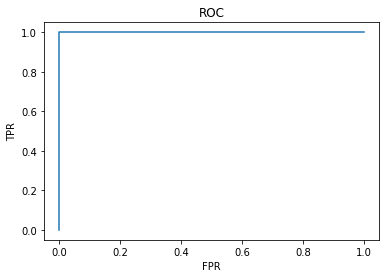

[<matplotlib.lines.Line2D at 0x7ffbbebc4f40>]

In [0]:
import matplotlib.pyplot as plt


# Returns as a list (false positive rate, true positive rate)
preds = predictions_complete.select('label','probability').rdd.map(lambda row: (float(row['probability'][1]), float(row['label'])))
points = CurveMetrics(preds).get_curve('roc')

plt.figure()
x_val = [x[0] for x in points]
y_val = [x[1] for x in points]
plt.title("ROC")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.plot(x_val, y_val)

In [0]:
predictions_complete = lr_model.bestModel.transform(test_indexed)

Out[43]:

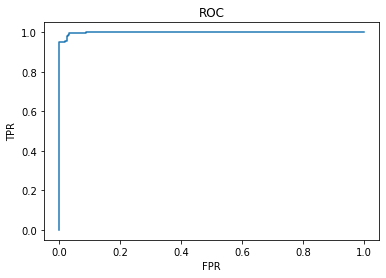

[<matplotlib.lines.Line2D at 0x7ffbbe506df0>]

In [0]:
import matplotlib.pyplot as plt


# Returns as a list (false positive rate, true positive rate)
preds = predictions_complete.select('label','probability').rdd.map(lambda row: (float(row['probability'][1]), float(row['label'])))
points = CurveMetrics(preds).get_curve('roc')

plt.figure()
x_val = [x[0] for x in points]
y_val = [x[1] for x in points]
plt.title("ROC")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.plot(x_val, y_val)